In [1]:
import matplotlib.pyplot as plt
import pandas as pd

 # Generate some data

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=1, cluster_std=3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

# Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).tail(10)

,Prediction,Actual
15,0,0
16,0,0
17,0,0
18,1,0
19,0,0
20,1,1
21,1,1
22,0,0
23,0,0
24,1,1


# Jon's Notes

Since this model is a classifier, we are plotting it to see how it looks like on a visualization.

In [5]:
import matplotlib.pyplot as plt

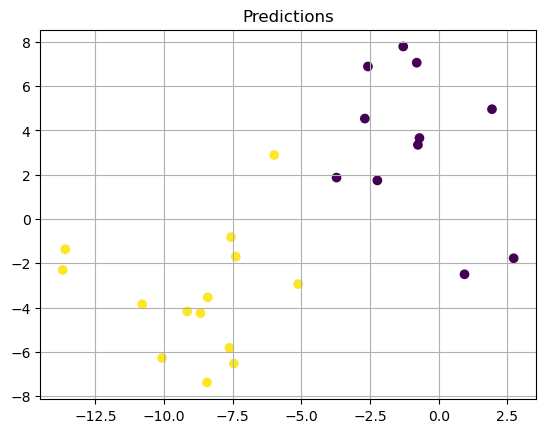

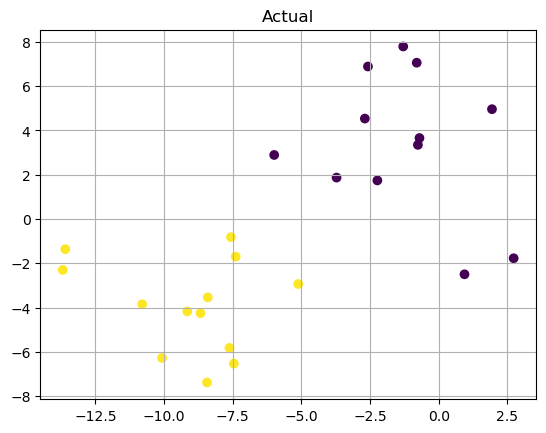

In [38]:
plt.figure("Predictions")
plt.title("Predictions")
plt.scatter(X_test[:,0], X_test[:,1], marker="o", c=predictions)
plt.grid()

plt.figure("Actual")
plt.title("Actual")
plt.scatter(X_test[:,0], X_test[:,1], marker="o", c=y_test)

plt.grid()
plt.show()

# End of Jon's Notes

 # Confusion Matrix

In [3]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[11,  1],
       [ 0, 13]])

 # Classification Report

In [4]:
from sklearn.metrics import classification_report
target_names = ["Class Purple", "Class Yellow"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

Class Purple       1.00      0.92      0.96        12
Class Yellow       0.93      1.00      0.96        13

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



# Jon's Short Notes

In [39]:
# To load images from a URL
from IPython.display import Image

Precision measures **the extend of error caused by False Positives (FPs)** whereas **recall measures the extend of error caused by False Negatives (FNs)**.

We can infer that from their mathematical calculations:
* Precision = TP / (TP + FP) 
    * where we are including only the FP counts.
* Recall = TP / (TP + FN) 
    * where we are including only the FN counts.

This is very important based on business context, for example:

In [41]:
# Image referenced from https://towardsdatascience.com/essential-things-you-need-to-know-about-f1-score-dbd973bf1a3#4e28
Image(url="https://miro.medium.com/v2/resize:fit:720/format:webp/1*ofXM4xP4FssT8b_ghaDePg.png")

In this context, would you prefer your model to bias towards FPs or FNs?
* Scenario #2 represents FPs. Of 900 patients who really do not have cancer, the model says 80 of them do. These 80 patients will probably undergo expensive and unnecessary treatments, at the expense of their well-being.
* Scenario #3 represents FNs. Of 100 patients who really have cancer, the model says 20 of them don’t. These 20 patients would go undiagnosed and fail to receive proper treatment.

*Excerpt taken from https://towardsdatascience.com/essential-things-you-need-to-know-about-f1-score-dbd973bf1a3#4e28

Recall and precision are inversely proportional and mutually exclusive, because it is categorizing the errors into 2 distinct buckets.

How can we balance the 2 scores?

**The answer is the F1-score, where F1 is a harmonic mean between the precision and recall scores.**

F1-score = 2 / ( (1/Precision) + (1/Recall) )

F1 score ranges between 0 and 1, where 1 is the best.